# Decision Tree Classification and Evaluation Metrics
* How to implement a decision tree algorithm in scikit learn
* Understand classification accuracy as basic evaluation metric and identify its shortcomings
* 

In [7]:
# read the data into a Pandas DataFrame
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age','label']
pima = pd.read_csv('diabetes.csv', header=0, names=col_names)

pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']

# X is a matrix, hence we use [] to access the features we want in feature_cols
X = pima[feature_cols]

# y is a vector, hence we use dot to access 'label'
y = pima.label

In [10]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
# train a logistic regression model on the training set

from sklearn import tree

# instantiate model
dtree = tree.DecisionTreeClassifier(criterion='entropy')

# fit model
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
# make class predictions for the testing set
y_pred_class = dtree.predict(X_test)

In [15]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))


0.6302083333333334


In [25]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    121
1     71
Name: label, dtype: int64

In [24]:
# examine the class distribution of the predictions (using a Pandas Series method)
pd.Series(y_pred_class).value_counts()

0    128
1     64
dtype: int64

In [27]:
# calculate the percentage of ones
# because y_test only contains ones and zeros, we can simply calculate the mean = percentage of ones
y_test.mean()*100

36.97916666666667

In [28]:
# calculate the percentage of zeros
(1 - y_test.mean())*100

63.02083333333333

In [31]:
# print the first  30 true and predicted responses
print('True: ', y_test.values[0:30])
print('False:', y_pred_class[0:30])


True:  [0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1]
False: [1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1]


In [48]:
# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
conf = metrics.confusion_matrix(y_test, y_pred_class)

In [49]:
print(conf)

[[89 32]
 [39 32]]


In [57]:
# save confusion matrix and slice into four pieces
print(conf)
#[row, column]
TP = conf[1, 1]
TN = conf[0, 0]
FP = conf[0, 1]
FN = conf[1, 0]

[[89 32]
 [39 32]]


In [70]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.6302083333333334
0.6302083333333334


In [59]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.3697916666666667
0.36979166666666663


In [60]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(metrics.recall_score(y_test, y_pred_class))

0.4507042253521127
0.4507042253521127


In [61]:
specificity = TN / (TN + FP)

print(specificity)


0.7355371900826446


In [62]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)


0.2644628099173554
0.2644628099173554


In [63]:
precision = TP / float(TP + FP)

print(precision)
print(metrics.precision_score(y_test, y_pred_class))

0.5
0.5


In [66]:
metrics.f1_score(y_test, y_pred_class)

0.47407407407407404

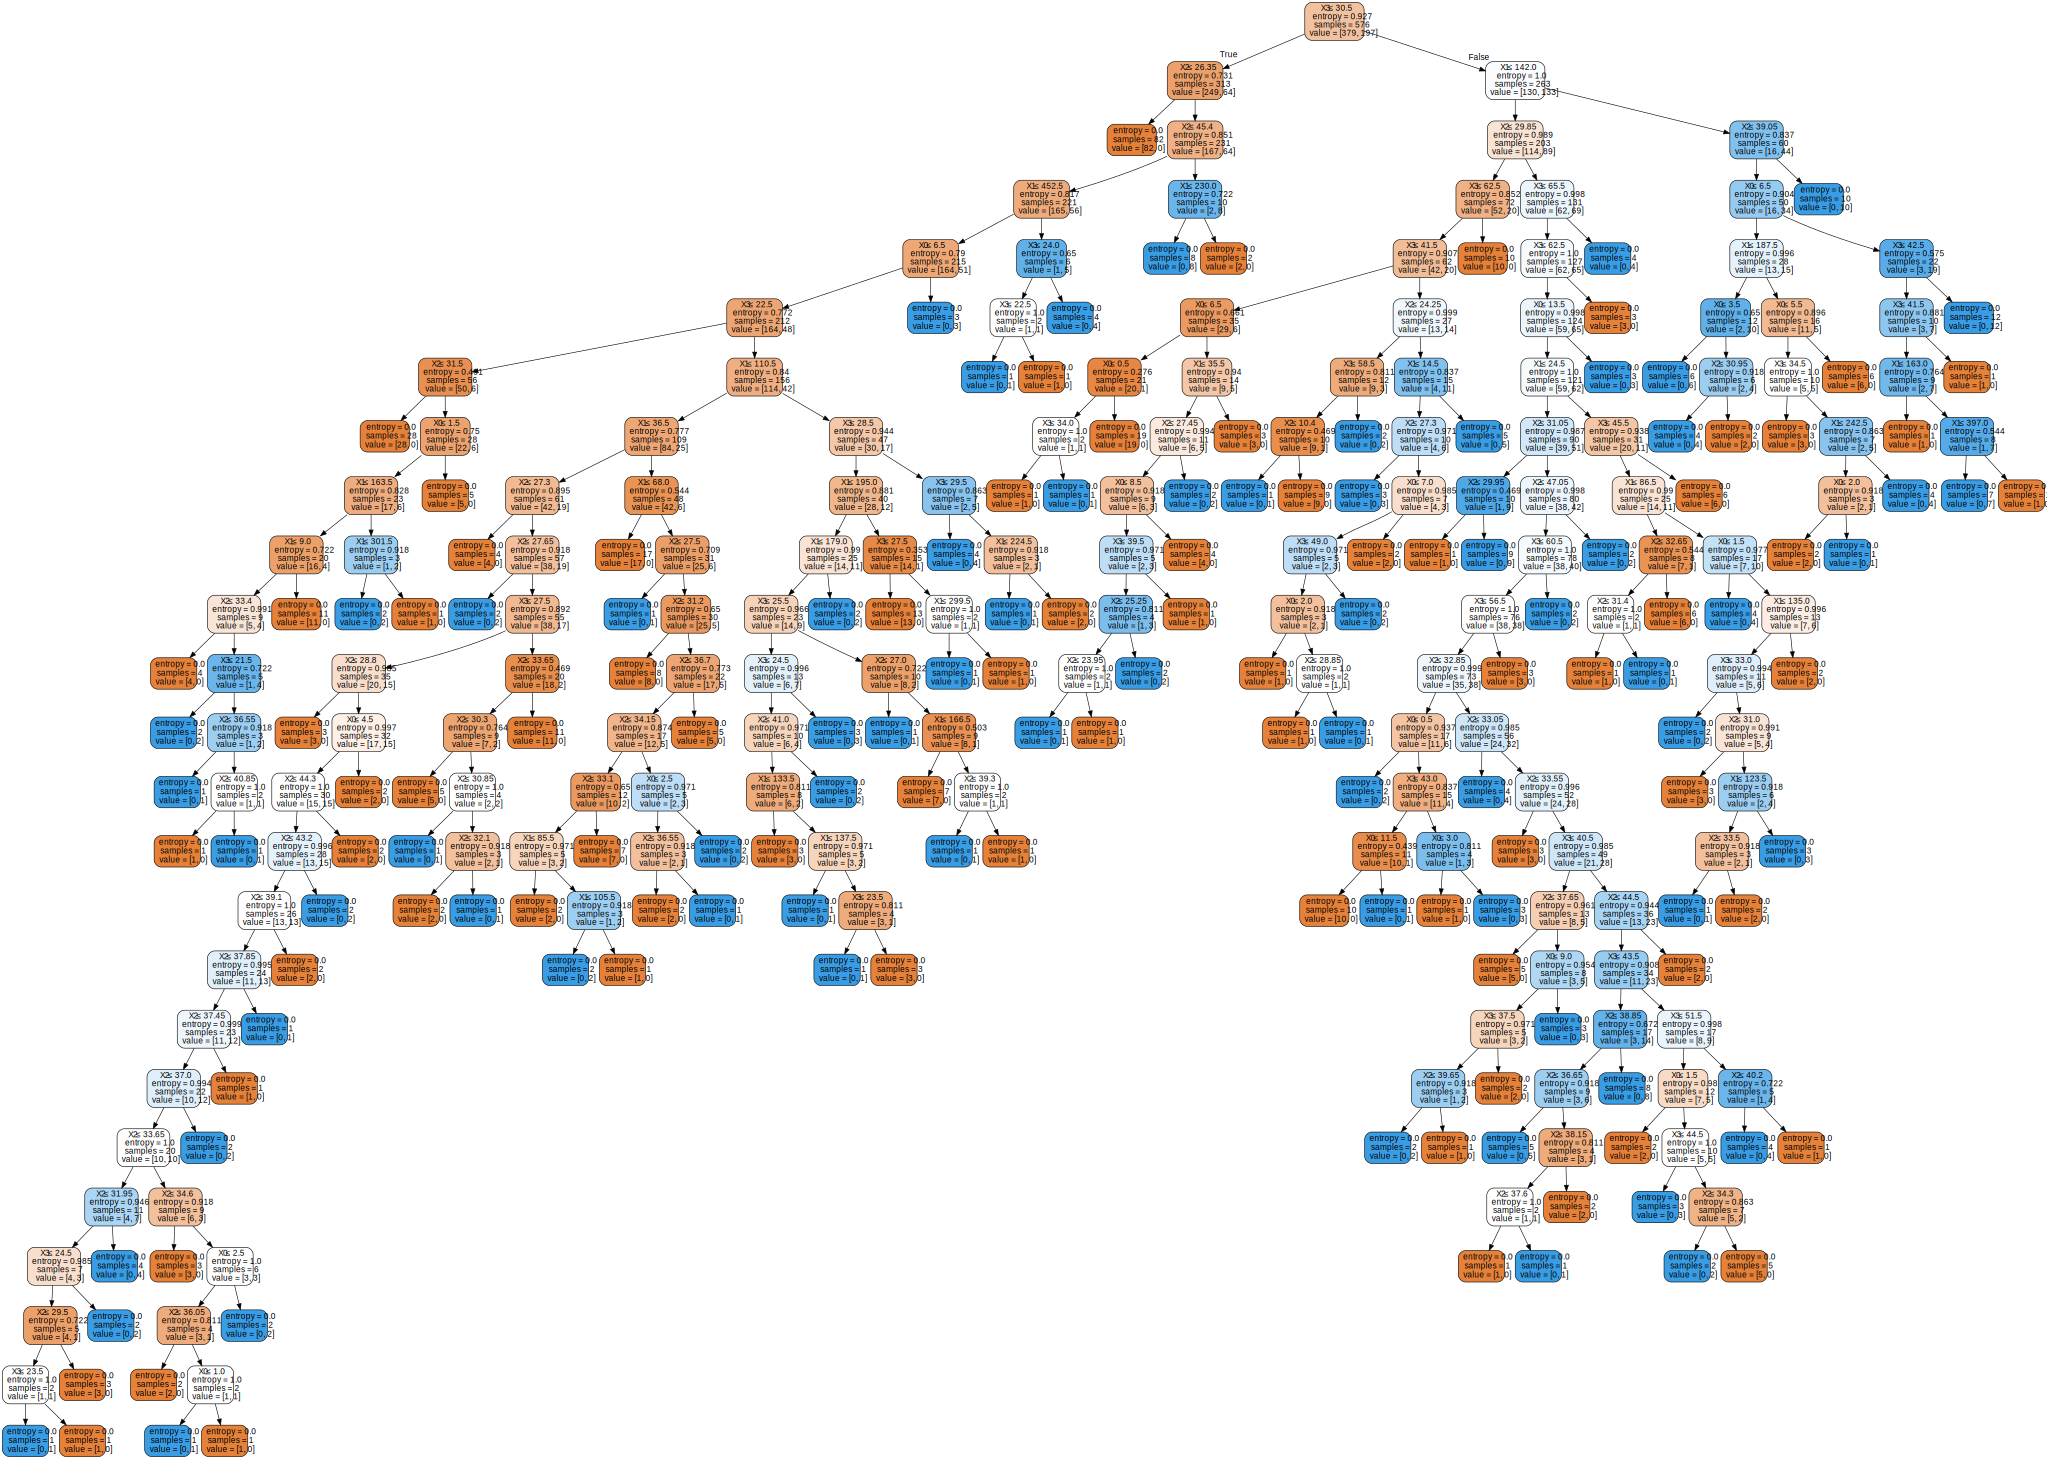

In [53]:

import graphviz 
dot_data = tree.export_graphviz(dtree, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data) 
graph


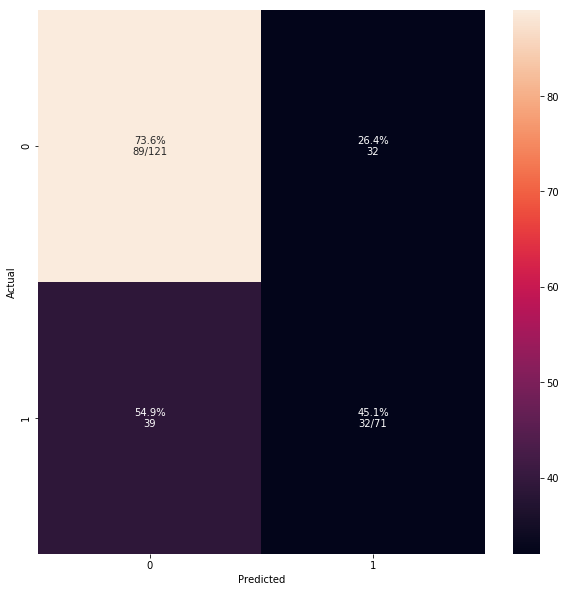

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def cm_analysis(y_true, y_pred, filename, labels, ymap=None, figsize=(10,10)):
    """
    Generate matrix plot of confusion matrix with pretty annotations.
    The plot image is saved to disk.
    args: 
      y_true:    true label of the data, with shape (nsamples,)
      y_pred:    prediction of the data, with shape (nsamples,)
      filename:  filename of figure file to save
      labels:    string array, name the order of class labels in the confusion matrix.
                 use `clf.classes_` if using scikit-learn models.
                 with shape (nclass,).
      ymap:      dict: any -> string, length == nclass.
                 if not None, map the labels & ys to more understandable strings.
                 Caution: original y_true, y_pred and labels must align.
      figsize:   the size of the figure plotted.
    """
    if ymap != None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax)
    plt.savefig(filename)
    
cm_analysis(y_test, y_pred_class,'conf', [0, 1] )

In [67]:
dtree.classes_

array([0, 1])